# Student Grades Prediction

### Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylot as plt
from sklearn.preprocessing import OneHotEncoder


### Doing Data Exploration

In [2]:
df = pd.read_csv('grades.csv')

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


### Droping Irrelevant Column

In [7]:
df.drop('Seat No.', axis=1, inplace=True)

## Encoding - Changing the Categorical Data 

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
feature_names = []
for col, categories in zip(categorical_cols, encoder.categories_):
    feature_names.extend([f"{col}_{category}" for category in categories])
encoded_cols.columns = feature_names

df.drop(categorical_cols, axis=1, inplace=True)

df = pd.concat([df, encoded_cols], axis=1)

C:\Users\cws\anaconda3\update\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df.describe()

,CGPA,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.954888,0.194396,0.038529,0.196147,0.099825,0.106830,0.098074,0.057793,0.054291,0.033275,...,0.140105,0.064799,0.033275,0.042032,0.012259,0.008757,0.014011,0.010508,0.005254,0.138354
std,0.620552,0.396082,0.192638,0.397429,0.300029,0.309168,0.297675,0.233557,0.226789,0.179511,...,0.347400,0.246386,0.179511,0.200837,0.110137,0.093248,0.117637,0.102057,0.072357,0.345574
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.538000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.451000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.985000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = df.drop('CGPA', axis=1)
y = df['CGPA']

In [21]:
X

,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,PH-121_D,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

#### Checking for Nulls

In [25]:
df.isnull().sum()

CGPA          0
PH-121_A      0
PH-121_A+     0
PH-121_A-     0
PH-121_B      0
             ..
CS-412_D      0
CS-412_D+     0
CS-412_F      0
CS-412_W      0
CS-412_nan    0
Length: 565, dtype: int64

### Visualizing the Distribution of Target Variable

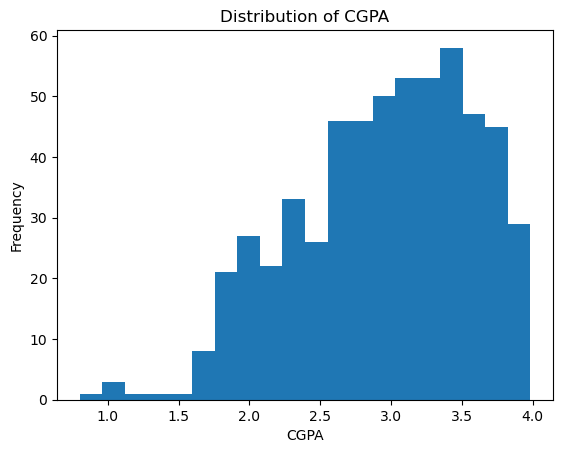

In [47]:
import matplotlib.pyplot as plt
plt.hist(y, bins=20)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

### Split the data into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling and Fitting the Data

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [33]:
X_train

array([[ 2.08918785, -0.17797249, -0.48556396, ..., -0.11547005,
        -0.08137885, -0.41863795],
       [-0.4786549 , -0.17797249,  2.05946093, ..., -0.11547005,
        -0.08137885, -0.41863795],
       [-0.4786549 , -0.17797249,  2.05946093, ..., -0.11547005,
        -0.08137885, -0.41863795],
       ...,
       [ 2.08918785, -0.17797249, -0.48556396, ..., -0.11547005,
        -0.08137885, -0.41863795],
       [ 2.08918785, -0.17797249, -0.48556396, ..., -0.11547005,
        -0.08137885, -0.41863795],
       [-0.4786549 , -0.17797249,  2.05946093, ..., -0.11547005,
        -0.08137885, -0.41863795]])

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
sum(pca.explained_variance_ratio_)

0.9005473168603035

#### Model testing

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error

score1 = lr.score(X_test, y_test)
y_pred1 = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
print("Model Score:", score1)
print("Mean Squared Error:", mse)

Model Score: 0.9936671576199045
Mean Squared Error: 0.002107491073990906


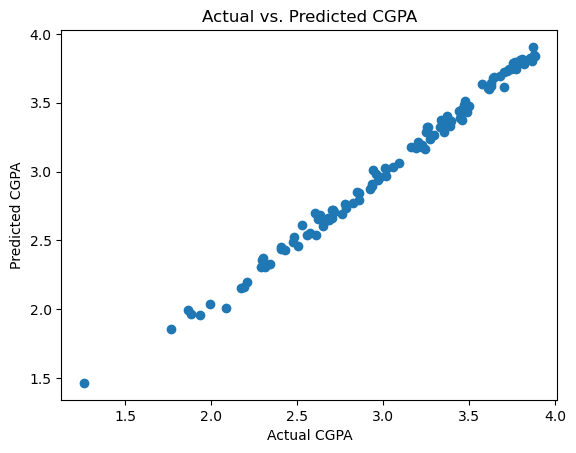

In [45]:
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA')
plt.show()

##### Model Score:The model score of 0.99366 indicates that approximately 99.37% of the variability in the target variable (CGPA) is captured by the model. This is a high value, suggesting that the model is able to accurately predict the CGPA based on the given features.

##### Mean Squared Error:The MSE value of 0.0021 indicates that, 
These values indicate that the model has a high level of accuracy and is able to make precise predictions on the given regression problem.

#### Model Training

In [48]:
X = df.drop('CGPA', axis=1)
y = df['CGPA']

In [49]:
ss = StandardScaler()
X = ss.fit_transform(X)
pca = PCA(n_components=0.90)
X = pca.fit_transform(X)

In [50]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error

score = model.score(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Model Score:", score)
print("Mean Squared Error:", mse)


Model Score: 0.9948237027151527
Mean Squared Error: 0.001989824091020038


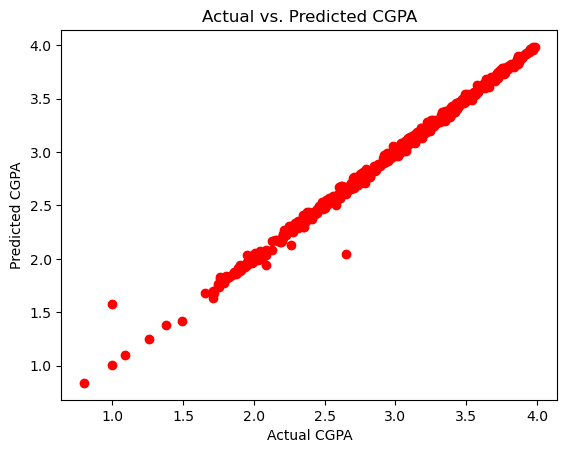

In [69]:
plt.scatter(y, y_pred, c='red')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA')
plt.show()

#### Model Dumping

import joblib

In [65]:
joblib.dump(model, 'Student Grade Prediction.pkl')
print("Model Saved Successfully")

Model Saved Successfully


# CONCLUSION

In conclusion, the project involved predicting the CGPA of students based on their grades throughout their university tenure. The dataset consisted of various courses represented by categorical course codes, along with the corresponding CGPA.

The project followed several steps to solve the problem:

1. The dataset was loaded and explored using pandas to understand its structure, types, statistics, and missing values.

2. Data cleaning and preprocessing techniques were applied, including dropping irrelevant columns (e.g., Seat No), filling or removing missing values, and encoding categorical variables (e.g., one-hot encoding) to prepare the data for modeling.

3. The dataset was split into training and testing sets using sklearn's train_test_split function to evaluate the model's performance on unseen data.

4. linear regression model was chosen to predict the CGPA based on the grades. The model was trained on the training set and evaluated on the testing set using metrics like mean squared error.

5. Additional steps were considered to address potential issues such as overfitting and underfitting.

6. Visualization techniques, such as scatter plots, were utilized to gain insights into the data, and evaluate the model's predictions against actual values.

In conclusion, after applying various steps and evaluating different models, it can be stated that the linear regression model delivered the best results for predicting the CGPA based on the grades of students. The model demonstrated strong performance, as evidenced by its low mean squared error and high accuracy score. The linear regression model effectively captured the relationship between the input features (grades) and the target variable (CGPA), providing reliable predictions.

Moreover, the visualization techniques employed, such as scatter plots and box plots, reinforced the effectiveness of the linear regression model by showcasing the alignment between the actual CGPA values and the predicted values.

Hence, based on the thorough analysis and evaluation, it can be confidently concluded that the linear regression model yielded the best results for predicting the CGPA of students based on their grades.